In [14]:
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os
import glob
from osgeo import gdal
import scipy.ndimage
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import csv
import pprint
import h5py 
import gdal
from gdalconst import *
import datetime
import seaborn as sns
from numpy import zeros, newaxis
from scipy import stats
from statistics import mean
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [15]:
# choose size of boxplots
size = (15,10)
category_order =  'low_low', 'low_med', 'low_high', 'med_low', 'med_med', 'med_high', 'high_low', 'high_med', 'high_high'
HUE_order = 'sub500', '500_1500', 'above1500'

In [16]:
data = pd.read_csv("D:\\masters_data\\output\\csv\\Analysis\\data2.csv", header=None)

data = pd.read_csv("D:\\masters_data\\output\\csv\\Analysis\\data2.csv", header = None)
data.columns = ["latitude","longitude","H", "V", "row","col", "mean_canopy", "min_height", 
                "max_canopy", "median_canopy","canopy_openness", "VI", "Yearly_rainfall", "LC",
                "First_burns", "Second_burns", "Total_burns", "Tile"]

data['canopy_spread'] = (data['max_canopy'] - data['min_height']) /  data['mean_canopy']
data['VI'] = data['VI'] /  10000

ValueError: Length mismatch: Expected axis has 19 elements, new values have 18 elements

In [ ]:
data

In [10]:
# data sections
# rainfall
data_sub500 = data.loc[data['rainfall_band'] == "sub500"]
data_500_1500 = data.loc[data['rainfall_band'] == "500_1500"]
data_above1500 = data.loc[data['rainfall_band'] == "above1500"]

# BA_category
data_low_low = data.loc[data['BA_category'] == "low_low"]
data_low_med = data.loc[data['BA_category'] == "low_med"]
data_low_high = data.loc[data['BA_category'] == "low_high"]
data_med_low = data.loc[data['BA_category'] == "med_low"]
data_med_med = data.loc[data['BA_category'] == "med_med"]
data_med_high = data.loc[data['BA_category'] == "med_high"]
data_high_low = data.loc[data['BA_category'] == "high_low"]
data_high_med = data.loc[data['BA_category'] == "high_med"]
data_high_high = data.loc[data['BA_category'] == "high_high"]

# tile
H19V07 = data.loc[data['Tile'] == "H19V07"]
H19V08 = data.loc[data['Tile'] == "H19V08"]
H20V07 = data.loc[data['Tile'] == "H20V07"]
H20V08 = data.loc[data['Tile'] == "H20V08"]

# BA Category
low_low = data.loc[data['BA_category'] == "low_low"]
low_med = data.loc[data['BA_category'] == "low_med"]
low_high = data.loc[data['BA_category'] == "low_high"]
med_low = data.loc[data['BA_category'] == "med_low"]
med_med = data.loc[data['BA_category'] == "med_med"]
med_high = data.loc[data['BA_category'] == "med_high"]
high_low = data.loc[data['BA_category'] == "high_low"]
high_med = data.loc[data['BA_category'] == "high_med"]
high_high = data.loc[data['BA_category'] == "high_high"]

KeyError: 'rainfall_band'

In [ ]:
print(len(low_low))
print(len(low_med))
print(len(low_high))
print(len(med_low))
print(len(med_med))
print(len(med_high))
print(len(high_low))
print(len(high_med))
print(len(high_high))

In [ ]:
print(len(H19V07))
print(len(H19V08))
print(len(H20V07))
print(len(H20V08))

In [ ]:
print((sum(H19V07['Total_rainfall']) / len(H19V07)))
print((sum(H19V08['Total_rainfall']) / len(H19V08)))
print((sum(H20V07['Total_rainfall']) / len(H20V07)))
print((sum(H20V08['Total_rainfall']) / len(H20V08)))

## Data Averages Section

In [4]:
print("Total mean canopy: {}".format(round(data['mean_canopy'].mean(), 3)))
print("Sub 500mm/yr mean canopy: {}".format(round(data_sub500['mean_canopy'].mean(), 3)))
print("500 1500 mm/yr mean canopy: {}".format(round(data_500_1500['mean_canopy'].mean(), 3)))
print("Above 1500 mm/yr mean canopy: {}".format(round(data_above1500['mean_canopy'].mean(), 3)))

# might be worth taking out vlaues where canopy height is above 50m say?
# doesn't include 0 values, doesn't include where data isn't savannahs (check)

Total mean canopy: 8.846


NameError: name 'data_sub500' is not defined

In [14]:
print("Total mean canopy openness: {}".format(round(data['canopy_openness'].mean(), 3)))
print("Sub 500mm/yr mean canopy openness: {}".format(round(data_sub500['canopy_openness'].mean(), 3)))
print("500 1500 mm/yr mean canopy openness: {}".format(round(data_500_1500['canopy_openness'].mean(), 3)))
print("Above 1500 mm/yr mean canopy openness: {}".format(round(data_above1500['canopy_openness'].mean(), 3)))

Total mean canopy openness: 4.964
Sub 500mm/yr mean canopy openness: 4.909
500 1500 mm/yr mean canopy openness: 4.947
Above 1500 mm/yr mean canopy openness: 6.118


In [15]:
print("Total mean canopy spread: {}".format(round(data['canopy_spread'].mean(), 3)))
print("Sub 500mm/yr mean canopy spread: {}".format(round(data_sub500['canopy_spread'].mean(), 3)))
print("500 1500 mm/yr mean canopy spread: {}".format(round(data_500_1500['canopy_spread'].mean(), 3)))
print("Above 1500 mm/yr mean canopy spread: {}".format(round(data_above1500['canopy_spread'].mean(), 3)))

Total mean canopy spread: 2.174
Sub 500mm/yr mean canopy spread: 2.168
500 1500 mm/yr mean canopy spread: 2.177
Above 1500 mm/yr mean canopy spread: 2.184


## Data Plots

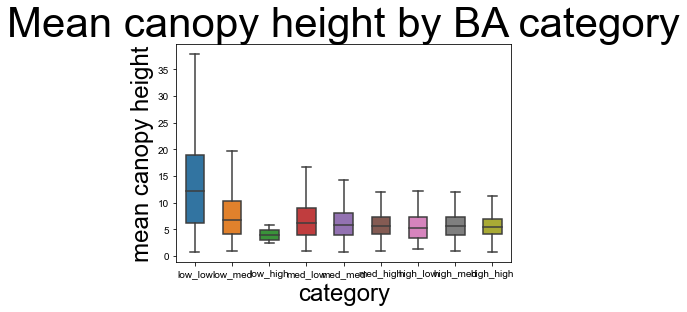

In [16]:
boxplot = sns.boxplot(x='BA_category', y='mean_canopy', data = data,showfliers=False, order=category_order, width=0.5)
boxplot.axes.set_title("Mean canopy height by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("mean canopy height", fontsize=24)
sns.set(rc={'figure.figsize':size})
plt.show()

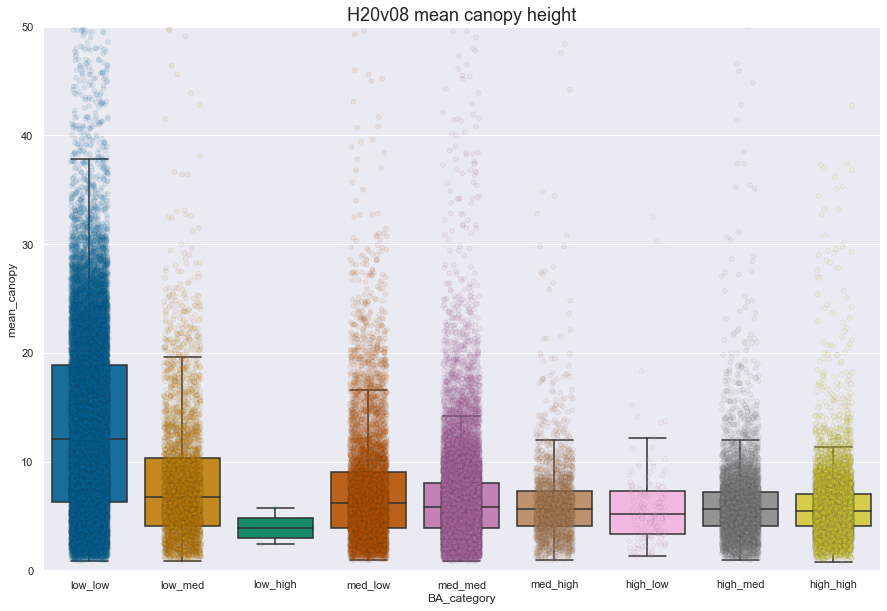

In [17]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  order=category_order, showfliers=False,
                 palette="colorblind")
ax = sns.stripplot(y='mean_canopy', x='BA_category', 
                 data=data, order=category_order, palette="colorblind",  
                 split=True, linewidth=0.5,alpha=0.1,jitter=0.2,
                 color='k')
ax.set_title('H20v08 mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()

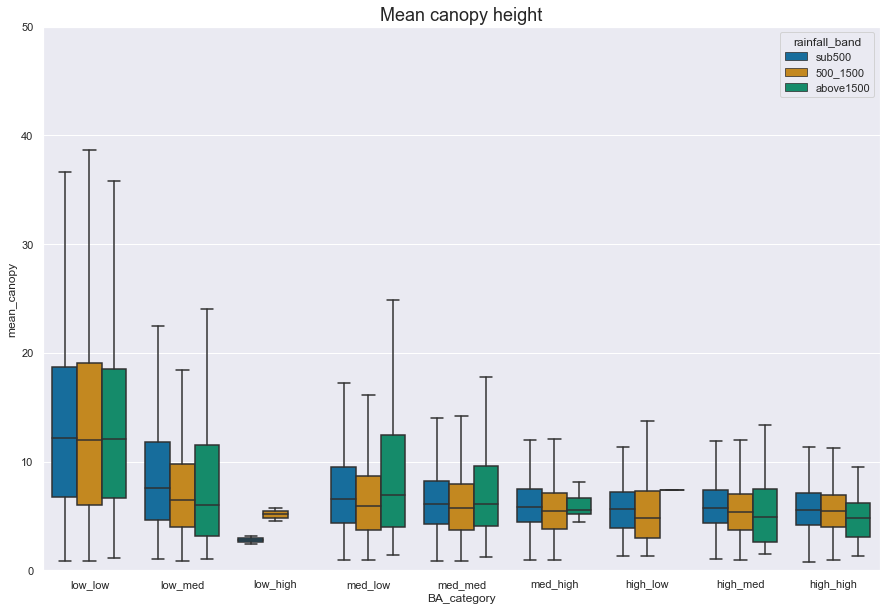

In [18]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  showfliers=False, palette="colorblind",
                 order=category_order, hue = "rainfall_band", hue_order = HUE_order)
ax.set_title('Mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'alpha'

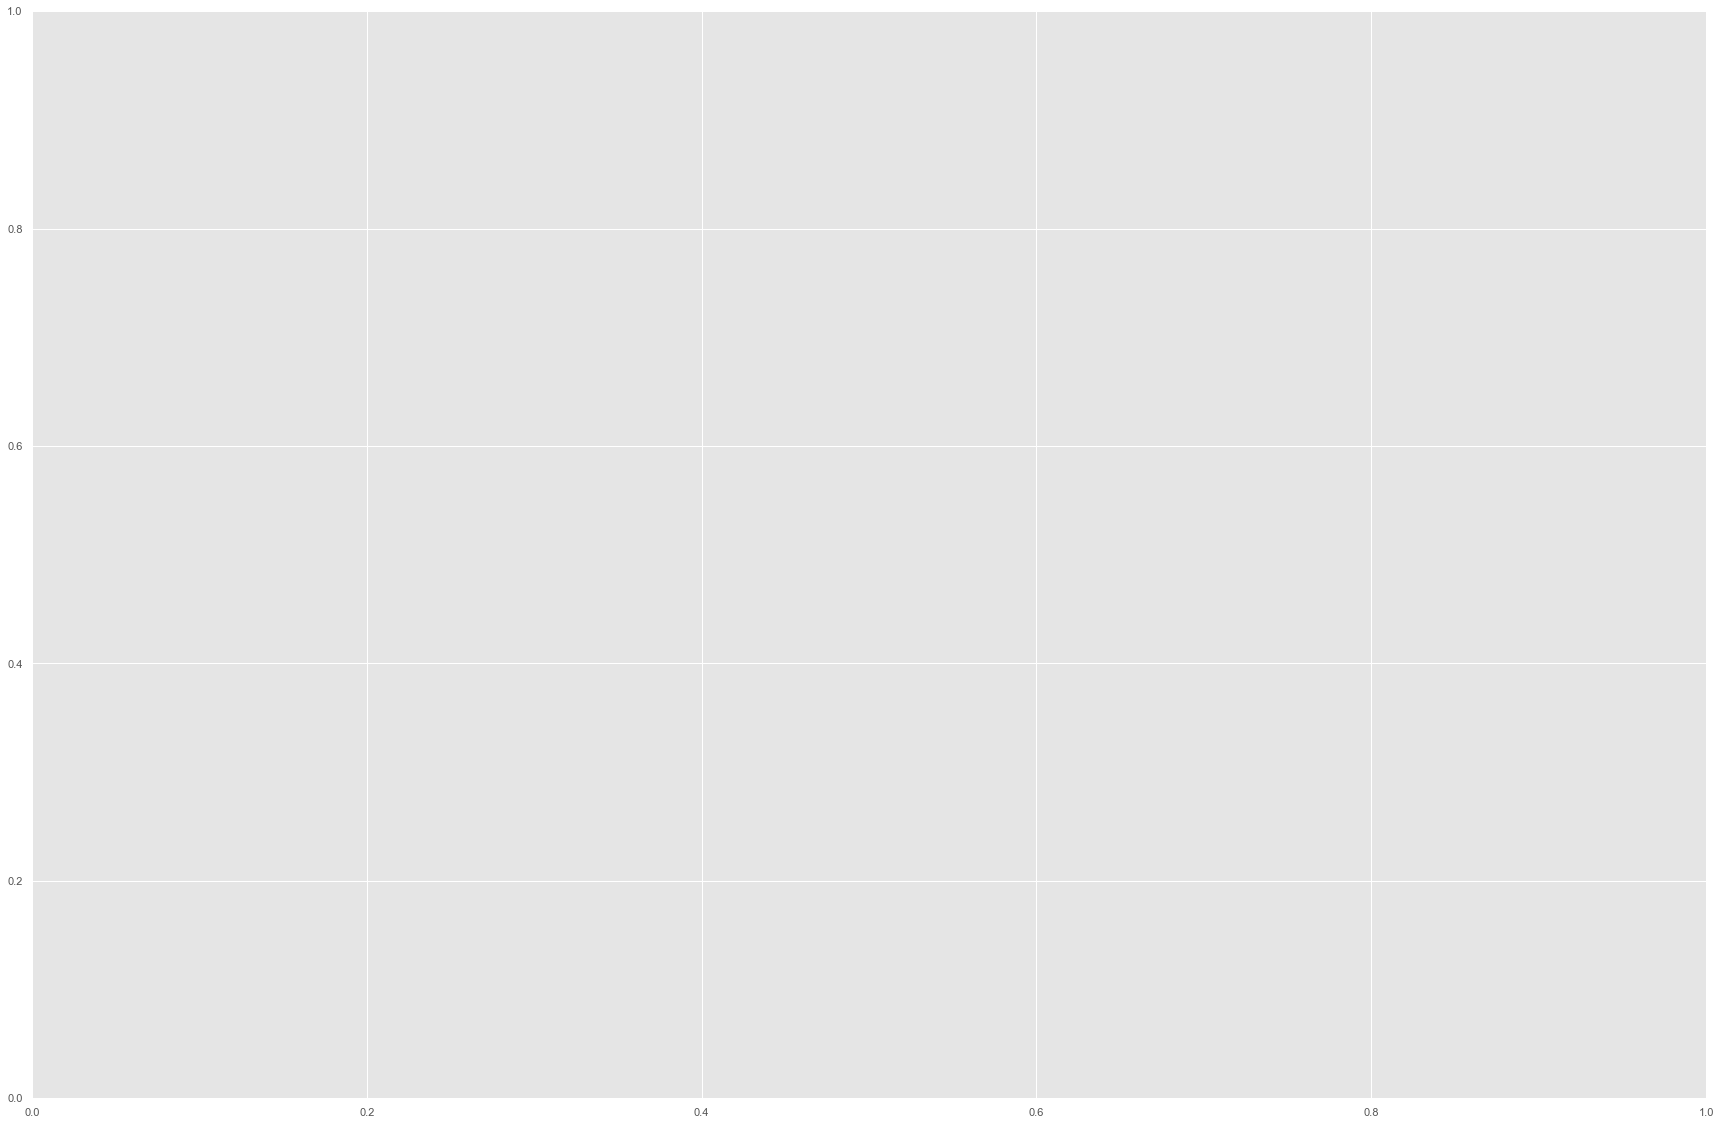

In [58]:
ylim = (0, 50)
ax = sns.boxplot(y='mean_canopy', x='BA_category', 
                 data=data,  showfliers=False, palette="colorblind",
                 order=category_order, hue = "rainfall_band")
ax = sns.stripplot(y='mean_canopy', x='BA_category', 
                 data=data, palette="colorblind",  
                 split=True, linewidth=0.5,alpha=0.01,jitter=0.2,
                 color='k', hue = "rainfall_band")
ax.set_title('H20v08 mean canopy height', fontsize =18)
ax.set(ylim = ylim)
sns.set(rc={'figure.figsize':size})
plt.show()
# could be interesting to calculate the data to two orders of magnitude - whats the word.

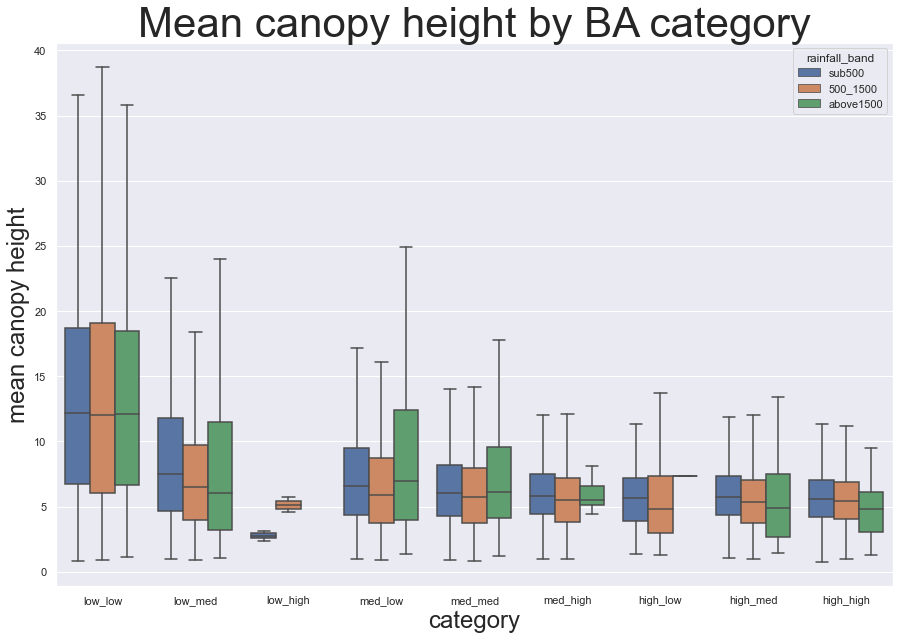

In [20]:
boxplot = sns.boxplot(x='BA_category', y='mean_canopy', data = data,showfliers=False, order=category_order, width=0.8, 
                      hue='rainfall_band')
boxplot.axes.set_title("Mean canopy height by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("mean canopy height", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

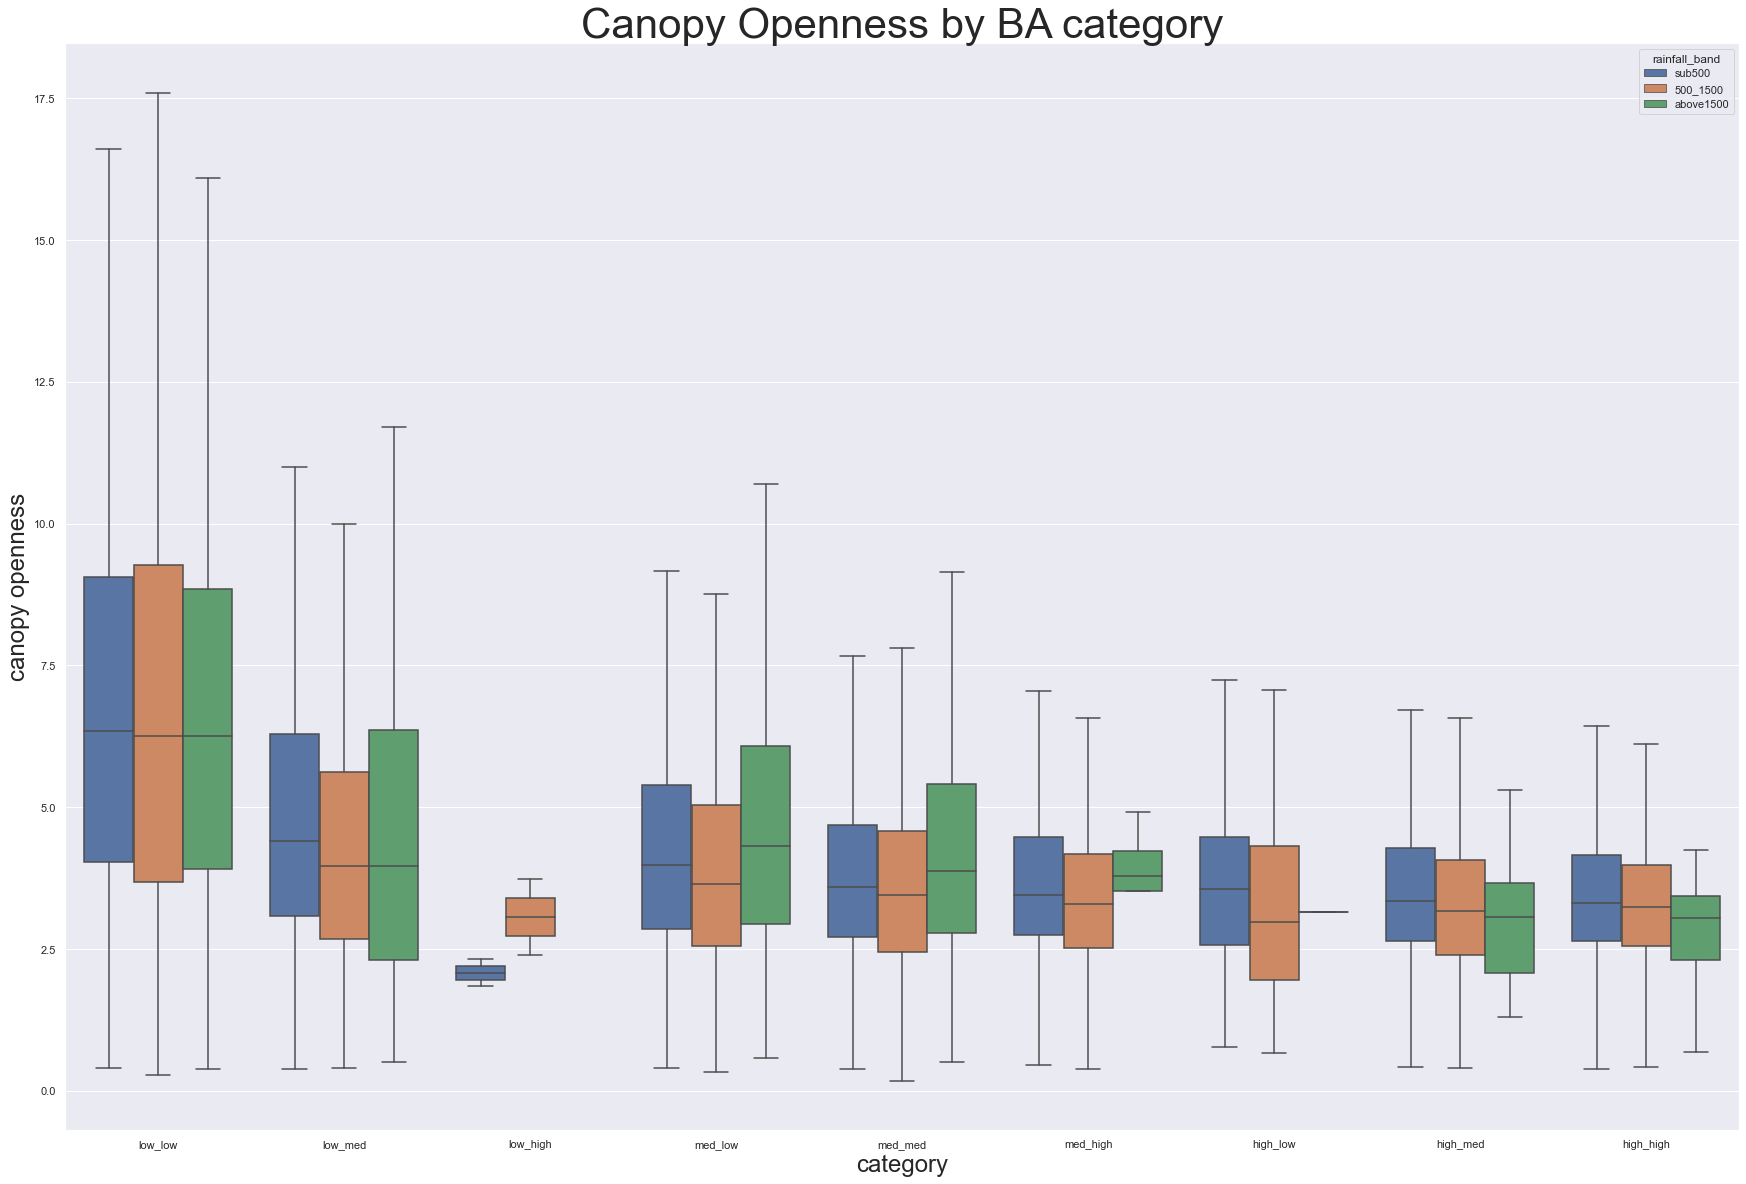

In [21]:
boxplot = sns.boxplot(x='BA_category', y='canopy_openness', data = data,showfliers=False, order=category_order, width=0.8,
                     hue='rainfall_band')
boxplot.axes.set_title("Canopy Openness by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("canopy openness", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

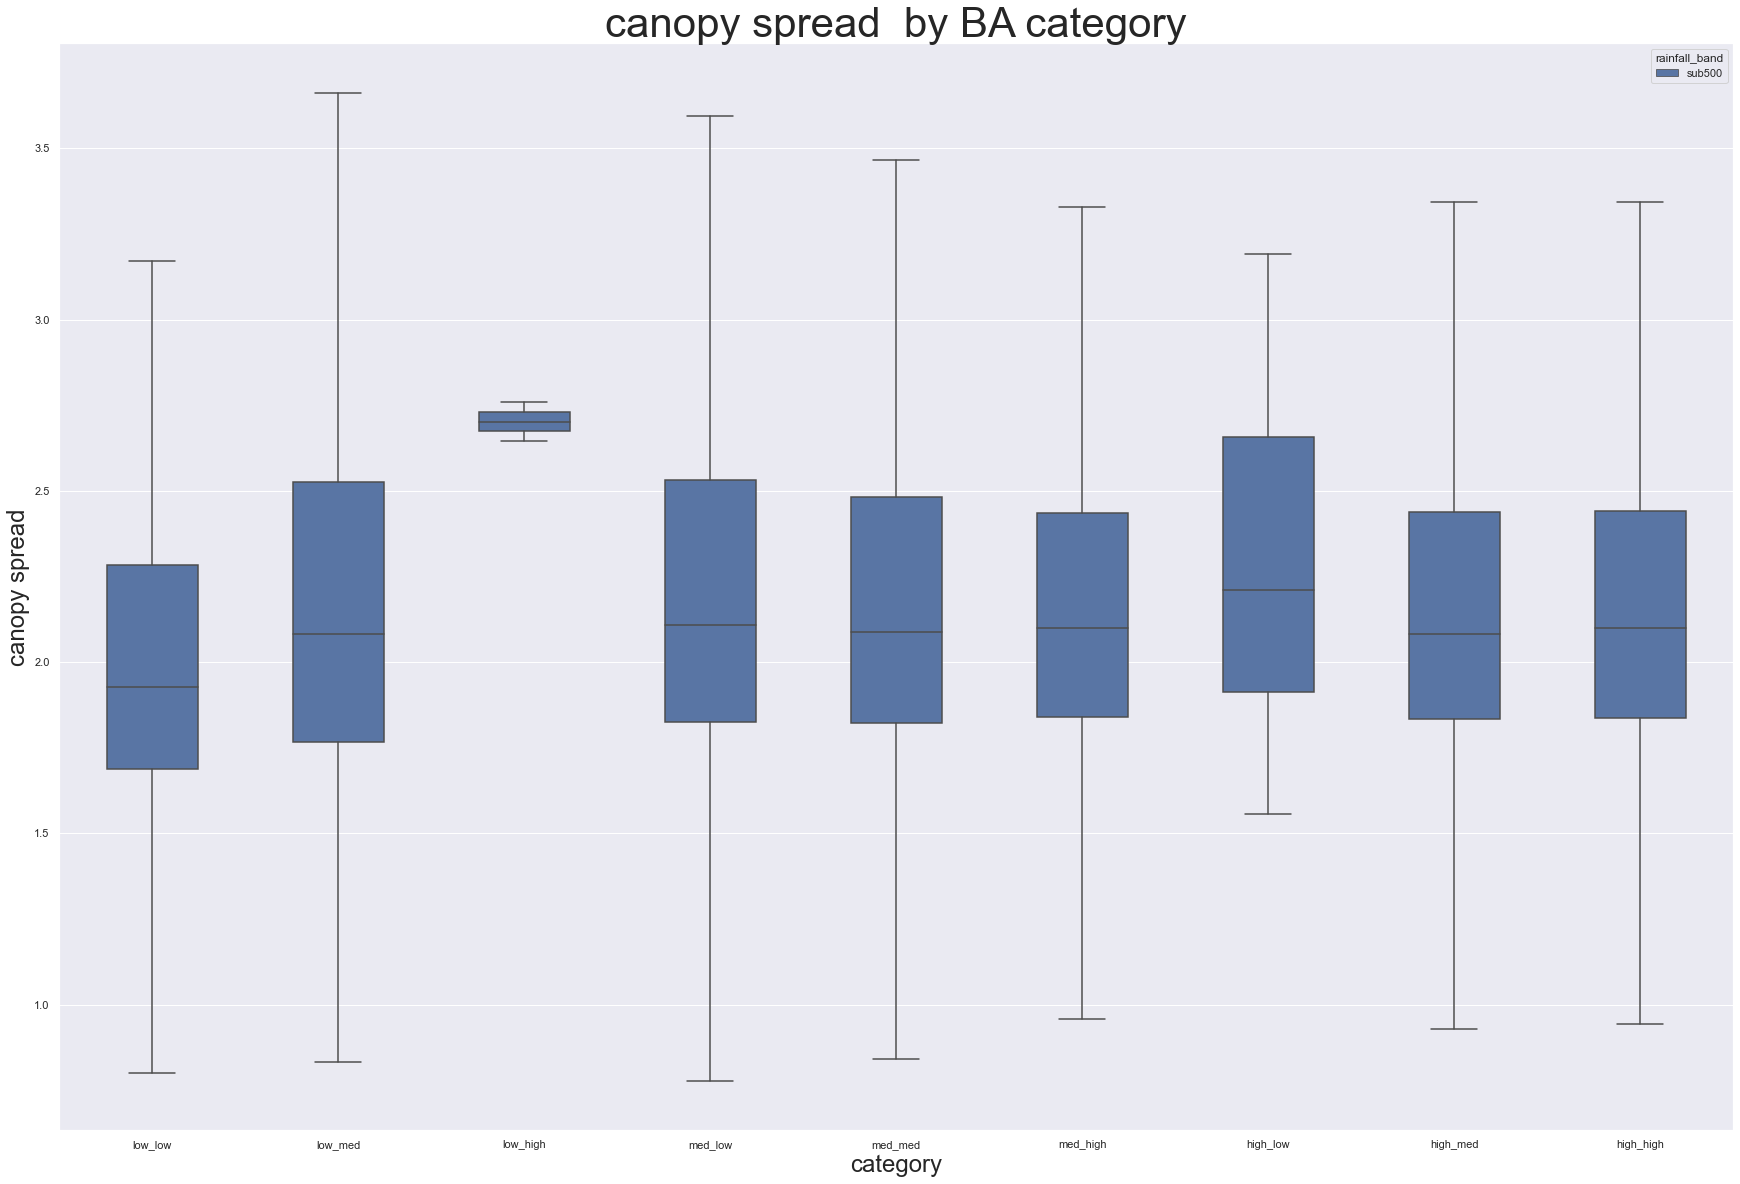

In [22]:
boxplot = sns.boxplot(x='BA_category', y='canopy_spread', data = data_sub500,showfliers=False, order=category_order, width=0.5, hue = 'rainfall_band')
boxplot.axes.set_title("canopy spread  by BA category", fontsize=42)
boxplot.set_xlabel("category", fontsize=24)
boxplot.set_ylabel("canopy spread", fontsize=24)
sns.set(rc={'figure.figsize':(30, 20)})
plt.show()

# Linear Regression

In [23]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

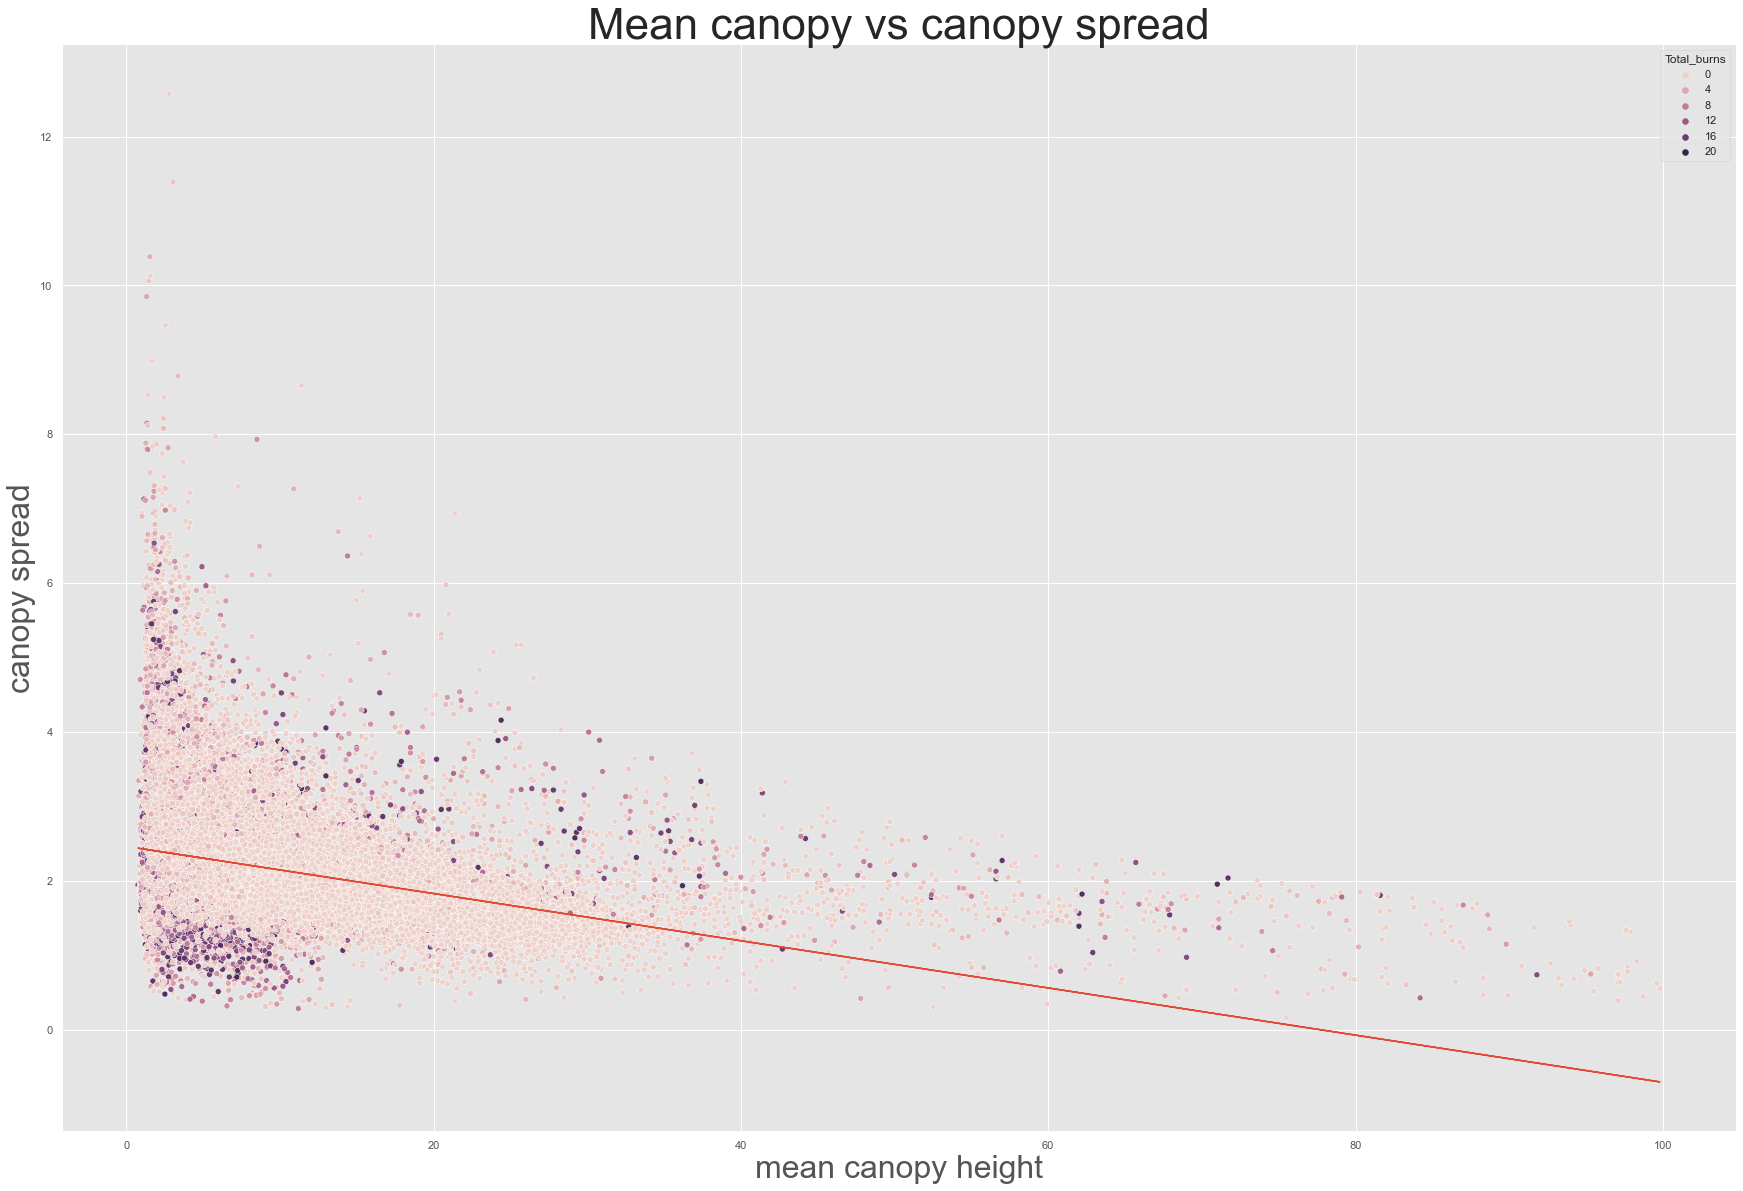

In [24]:
m, b = best_fit_slope_and_intercept(data['mean_canopy'],data['canopy_spread'])
regression_line = [(m*x)+b for x in data['mean_canopy']]

style.use('ggplot')
sns.color_palette=("dark:salmon_r")
sns.scatterplot(data['mean_canopy'],data['canopy_spread'],color='#003F72', hue = data["Total_burns"])
plt.plot(data['mean_canopy'], regression_line)
plt.title('Mean canopy vs canopy spread', fontsize = 44)
plt.xlabel('mean canopy height', fontsize = 32)
plt.ylabel('canopy spread', fontsize = 32)

plt.show()

Put ylim of 50m - 

In [25]:
X = data['mean_canopy'].values
Y = data['canopy_spread'].values
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [2.46204111]
Coefficients: 
 [[-0.03171662]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                 1.235e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:08   Log-Likelihood:                -70802.
No. Observations:               76723   AIC:                         1.416e+05
Df Residuals:                   76721   BIC:                         1.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

This agrees with my second hypothesis, that an in increase in mean canopy height leads to an increase in tree heterogeneity or a decrease in canopy spread.

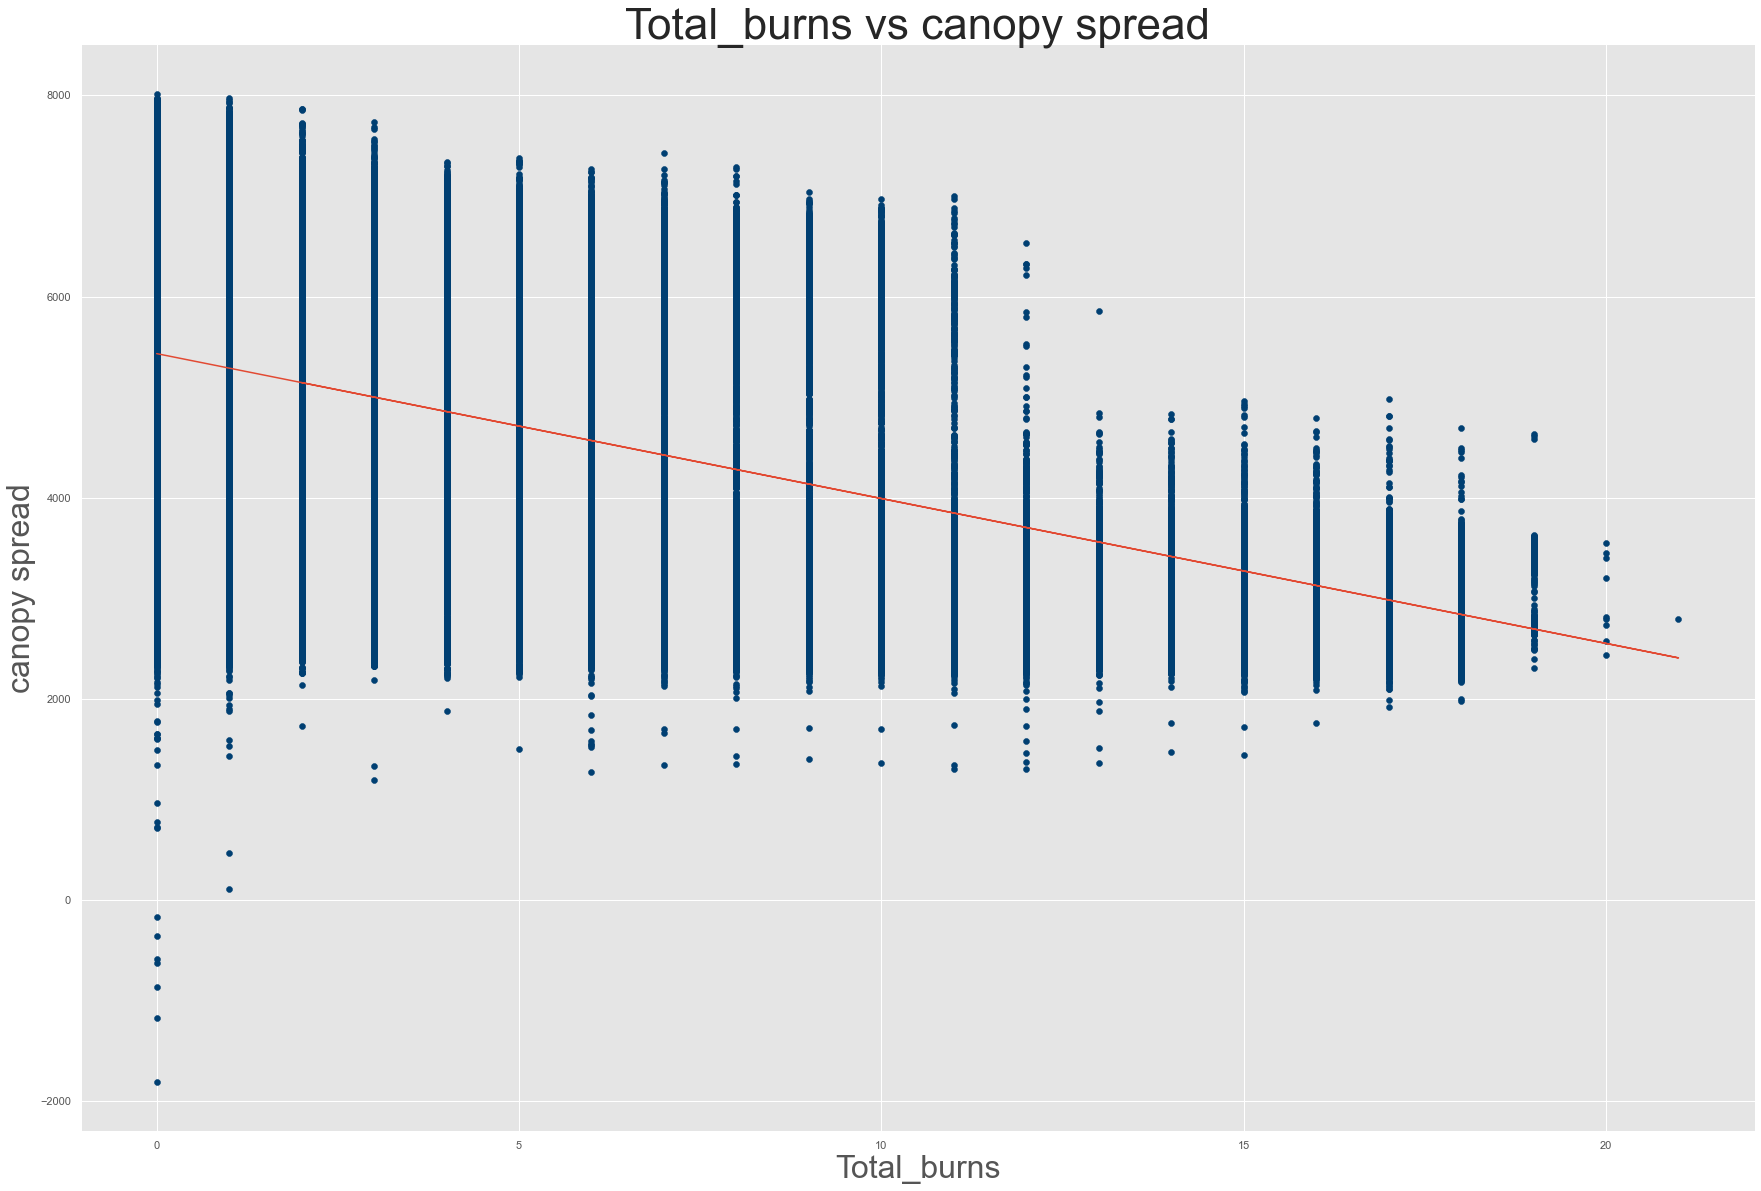

In [26]:
m, b = best_fit_slope_and_intercept(data['Total_burns'],data['mean NDVI'])
regression_line = [(m*x)+b for x in data['Total_burns']]

style.use('ggplot')
plt.scatter(data['Total_burns'],data['mean NDVI'],color='#003F72')
plt.plot(data['Total_burns'], regression_line)
plt.title('Total_burns vs canopy spread', fontsize = 44)
plt.xlabel('Total_burns', fontsize = 32)
plt.ylabel('canopy spread', fontsize = 32)

plt.show()

# # Mean NDVI vs Total Burns

In [27]:
x = data['Total_burns'].values
y = data['mean NDVI'].values

xH19V07 = H19V07['Total_burns'].values
yH19V07 = H19V07['mean NDVI'].values

xH19V08 = H19V08['Total_burns'].values
yH19V08 = H19V08['Total_burns'].values

xH20V07 = H20V07['Total_burns'].values
yH20V07 = H20V07['Total_burns'].values

xH20V08 = H20V08['Total_burns'].values
yH20V08 = H20V08['Total_burns'].values

In [28]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

xH19V07 = x.reshape(len(x), 1)
yH19V07 = y.reshape(len(y), 1)

xH19V08 = x.reshape(len(x), 1)
yH19V08 = y.reshape(len(y), 1)

xH20V07 = x.reshape(len(x), 1)
yH20V07 = y.reshape(len(y), 1)

xH20V08 = x.reshape(len(x), 1)
yH20V08 = y.reshape(len(y), 1)

In [29]:
X = data['Total_burns'].values
Y = data['mean NDVI'].values
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)
# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [5432.51439215]
Coefficients: 
 [[-144.02607208]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:11   Log-Likelihood:            -6.5845e+05
No. Observations:               76723   AIC:                         1.317e+06
Df Residuals:                   76721   BIC:                         1.317e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

This means that the 2.1% of the variation in y (mean NDVI) is explained by x (total burns) 

In [30]:
X = data['Total_rainfall'].values
Y = data['mean NDVI'].values
X = X.reshape(len(x), 1)
Y = Y.reshape(len(y), 1)
# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [2468.65123773]
Coefficients: 
 [[1.57247061]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7075.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:12   Log-Likelihood:            -6.6787e+05
No. Observations:               76723   AIC:                         1.336e+06
Df Residuals:                   76721   BIC:                         1.336e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

This means that 56.7% of the variation in y (mean NDVI) is explained by x (total burns) 

In [31]:
X = data[['Total_burns','Total_rainfall']]
Y = data['mean NDVI'].values
Y = Y.reshape(len(y), 1)
# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [3215.25859874]
Coefficients: 
 [[-142.08781149    1.49889301]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                 2.161e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:12   Log-Likelihood:            -6.5411e+05
No. Observations:               76723   AIC:                         1.308e+06
Df Residuals:                   76720   BIC:                         1.308e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

This means that 60.5% of the variation in y (mean NDVI) is explained by x (total burns & rainfall) 

# # mean canopy as the dependent variable

In [32]:
X = data[['Total_burns','Total_rainfall']]
Y = data['mean_canopy'].values
Y = Y.reshape(len(y), 1)
# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [12.59678346]
Coefficients: 
 [[-0.399664   -0.00117361]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3650.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:12   Log-Likelihood:            -2.6200e+05
No. Observations:               76723   AIC:                         5.240e+05
Df Residuals:                   76720   BIC:                         5.240e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [33]:
X = data['Total_burns'].values
Y = data['mean_canopy'].values
X = X.reshape(len(x), 1)
Y = Y.reshape(len(y), 1)
# X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price']
# with sklearn

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 [10.86070895]
Coefficients: 
 [[-0.39814638]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7131.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:12   Log-Likelihood:            -2.6208e+05
No. Observations:               76723   AIC:                         5.242e+05
Df Residuals:                   76721   BIC:                         5.242e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Text(0.5, 1.0, 'Mean canopy vs Total Burns')

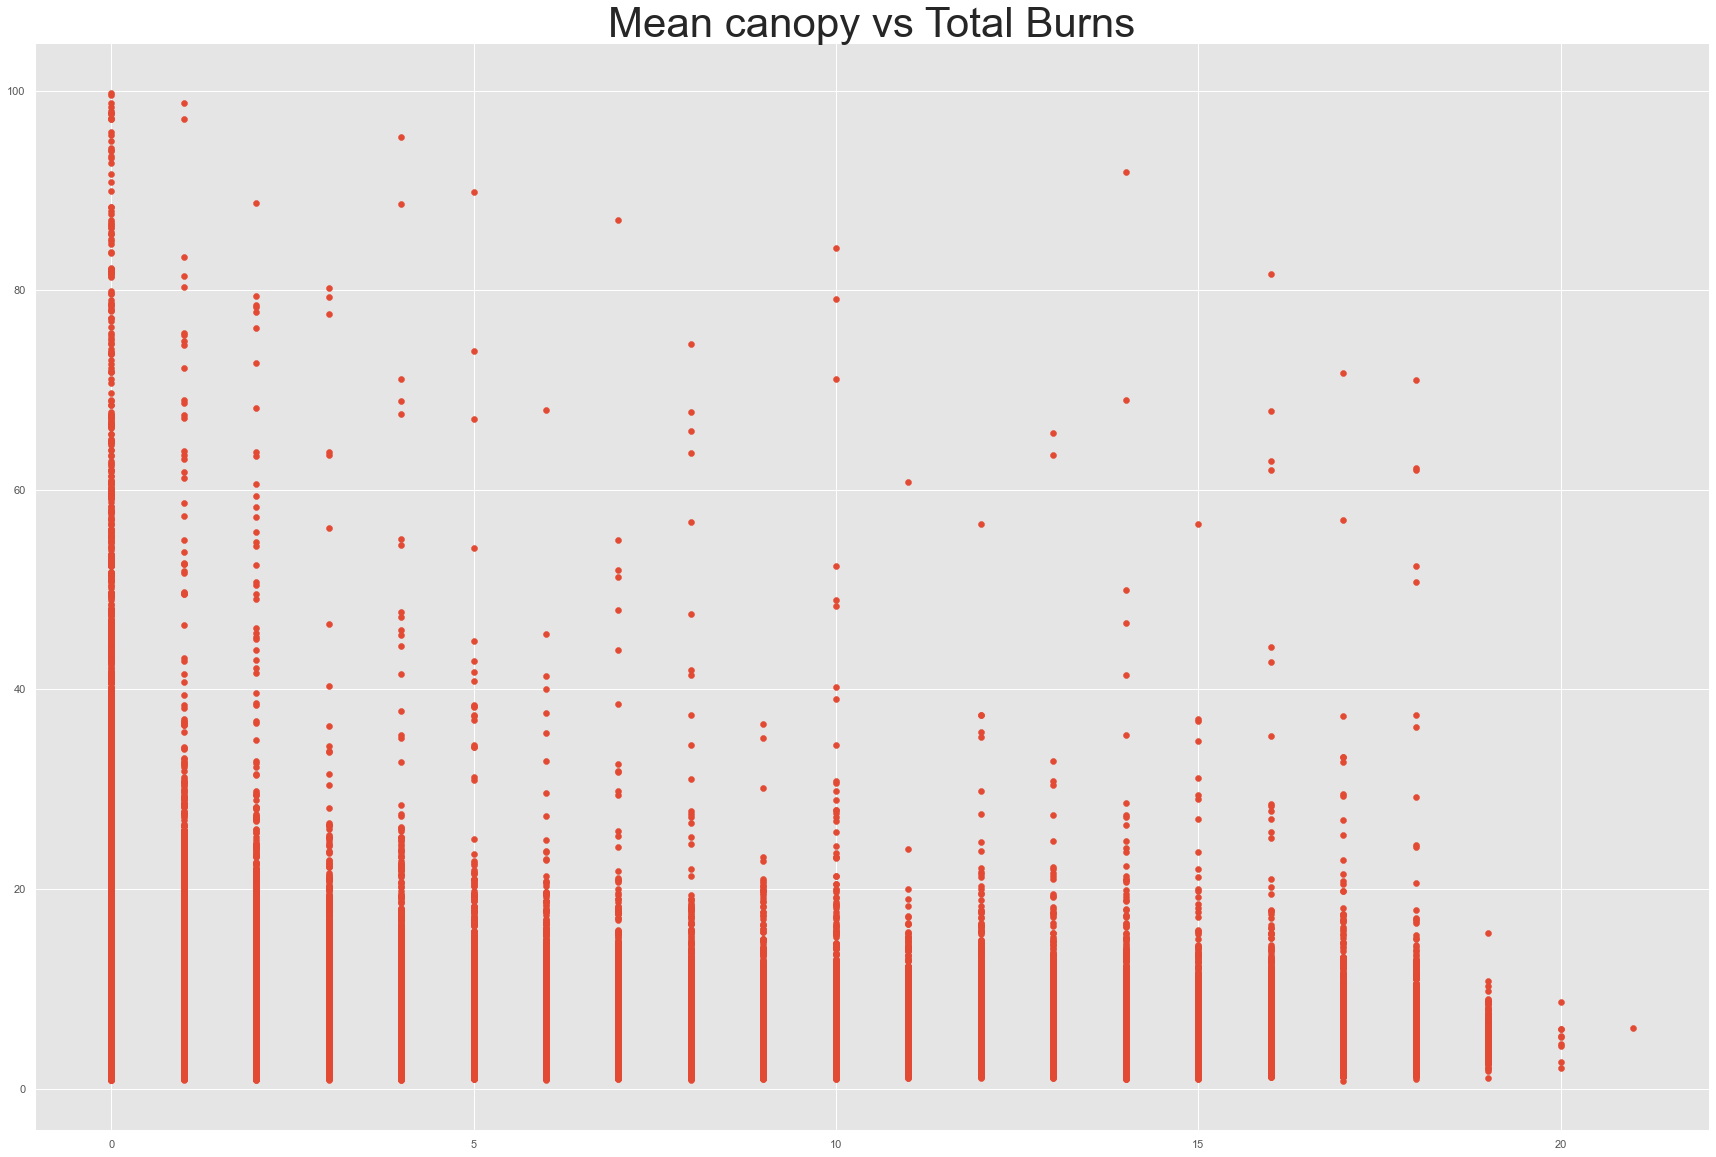

In [34]:
X = data['Total_burns'].values
Y = data['mean_canopy'].values

plt.scatter(X,Y)
plt.title("Mean canopy vs Total Burns", fontsize=42)

In [35]:
#Burns
burned1 = data.loc[data['Total_burns'] ==1]
burned2 = data.loc[data['Total_burns'] ==2]
burned3 = data.loc[data['Total_burns'] ==3]
burned4 = data.loc[data['Total_burns'] ==4]
burned5 = data.loc[data['Total_burns'] ==5]
burned6 = data.loc[data['Total_burns'] ==6]
burned7 = data.loc[data['Total_burns'] ==7]
burned8 = data.loc[data['Total_burns'] ==8]
burned9 = data.loc[data['Total_burns'] ==9]
burned10 = data.loc[data['Total_burns'] ==10]
burned11 = data.loc[data['Total_burns'] ==11]
burned12 = data.loc[data['Total_burns'] ==12]
burned13 = data.loc[data['Total_burns'] ==13]
burned14 = data.loc[data['Total_burns'] ==14]
burned15 = data.loc[data['Total_burns'] ==15]
burned16 = data.loc[data['Total_burns'] ==16]
burned17 = data.loc[data['Total_burns'] ==17]
burned18 = data.loc[data['Total_burns'] ==18]
burned19 = data.loc[data['Total_burns'] ==19]
burned20 = data.loc[data['Total_burns'] ==20]

mean1 = burned1.mean()
mean2 = burned1.mean()
mean3 = burned1.mean()
mean4 = burned1.mean()
mean5 = burned1.mean()
mean6 = burned1.mean()
mean7 = burned1.mean()
mean8 = burned1.mean()
mean9 = burned1.mean()
mean10 = burned1.mean()
mean11 = burned1.mean()
mean12 = burned1.mean()
mean13 = burned1.mean()
mean14 = burned1.mean()
mean15 = burned1.mean()
mean16 = burned1.mean()
mean17 = burned1.mean()
mean18 = burned1.mean()
mean19 = burned1.mean()
mean20 = burned1.mean()

In [36]:
print(mean1)
mean1.tolist()

mean_canopy                7.905648
canopy_max_height         16.997346
canopy_min_height          0.827494
canopy_median_height       7.660942
canopy_openness            4.519015
Total_rainfall          1478.532601
First_burns                0.415955
Second_burns               0.584045
Total_burns                1.000000
mean NDVI               5191.263131
latitude                  10.628058
longitude                 13.999443
canopy_spread              2.246338
dtype: float64


[7.905648411569465,
 16.997345898530106,
 0.8274940730203888,
 7.660942152678994,
 4.519015291607397,
 1478.5326010447945,
 0.41595542911332384,
 0.5840445708866762,
 1.0,
 5191.263131424731,
 10.628058321479372,
 13.99944286391655,
 2.246338119777292]

In [37]:
mean_canopy = []
canopy_max_height = []
canopy_min_height = []
canopy_median_height = []
canopy_openness = []
Total_rainfall = []
mean_NDVI = []
canopy_spread = []

In [38]:
number = 0
for i in range(20):
    result = data.loc[data['Total_burns'] == number]
    mean_result = result.mean()    
    mean_canopy.append(mean_result[0])
    canopy_max_height.append(mean_result[1])
    canopy_median_height.append(mean_result[2])
    canopy_openness.append(mean_result[3])
    Total_rainfall.append(mean_result[4])
    mean_NDVI.append(mean_result[5])
    canopy_spread.append(mean_result[6])
    number += 1

In [39]:
result = data.loc[data['Total_burns'] == 1]
mean_result = burned1.mean()
mean_canopy.append(mean_result[0])

In [40]:
mean_canopy

[12.890518389796192,
 7.905648411569465,
 7.180501955416504,
 6.64117447629548,
 6.578558235699519,
 6.538717590745913,
 6.256961678832117,
 6.257866346153847,
 6.335143146181082,
 6.028317710902812,
 6.413268800813007,
 6.000063492063492,
 6.442139534883721,
 6.228337438423645,
 6.284644124168514,
 6.02784780334728,
 6.080623489608506,
 5.972909223300971,
 5.880169050715214,
 5.3414465408805025,
 7.905648411569465]

In [49]:
x = list(range((20)))

In [45]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Total burns vs Mean Canopy')

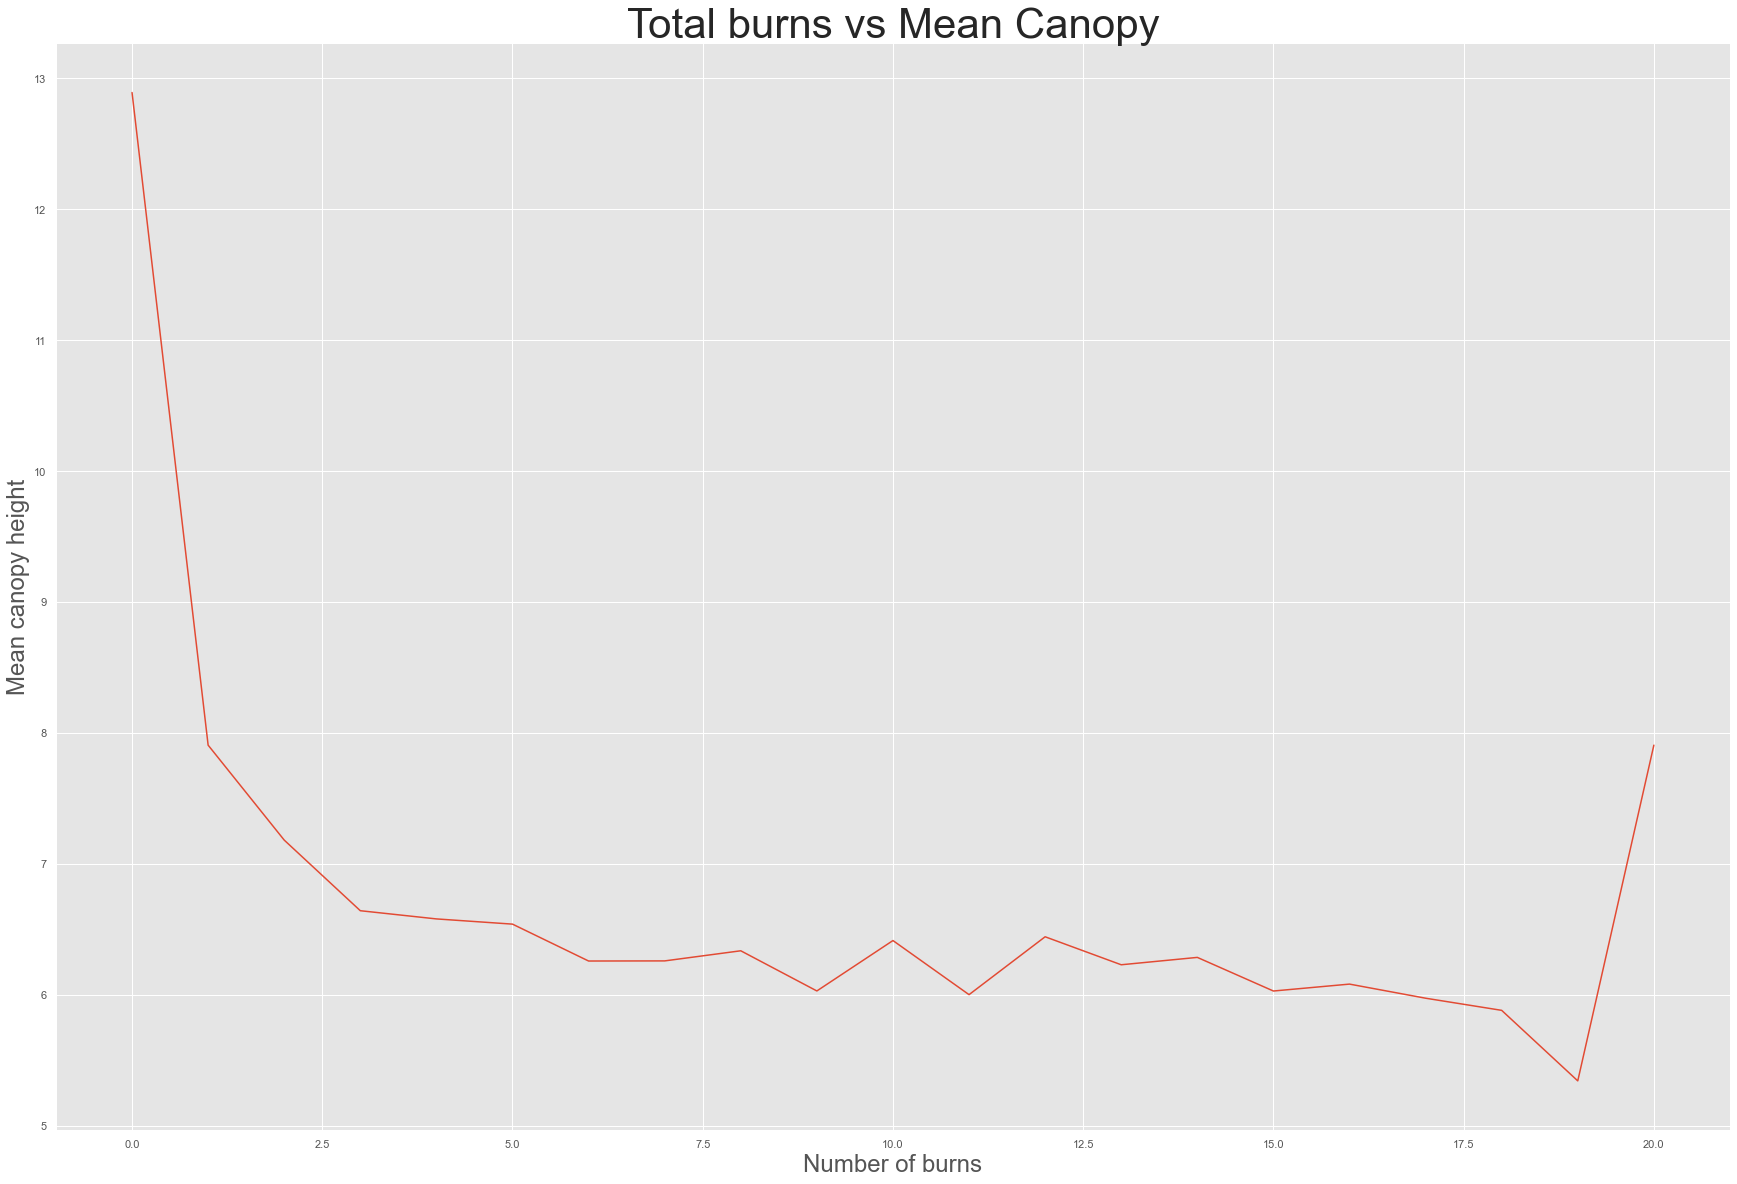

In [46]:
plt.plot(x, mean_canopy)
# plt.scatter(X,Y, color="gray")
plt.xlabel("Number of burns", fontsize=24)
plt.ylabel("Mean canopy height", fontsize=24)
plt.title("Total burns vs Mean Canopy", fontsize=42)

Do this analysis by rainfall type - keep constant ( see if relationship is the same) Try creating new rainfall bands ~200mm apart. 

Multiple linear regression to include rainfall and burned area

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

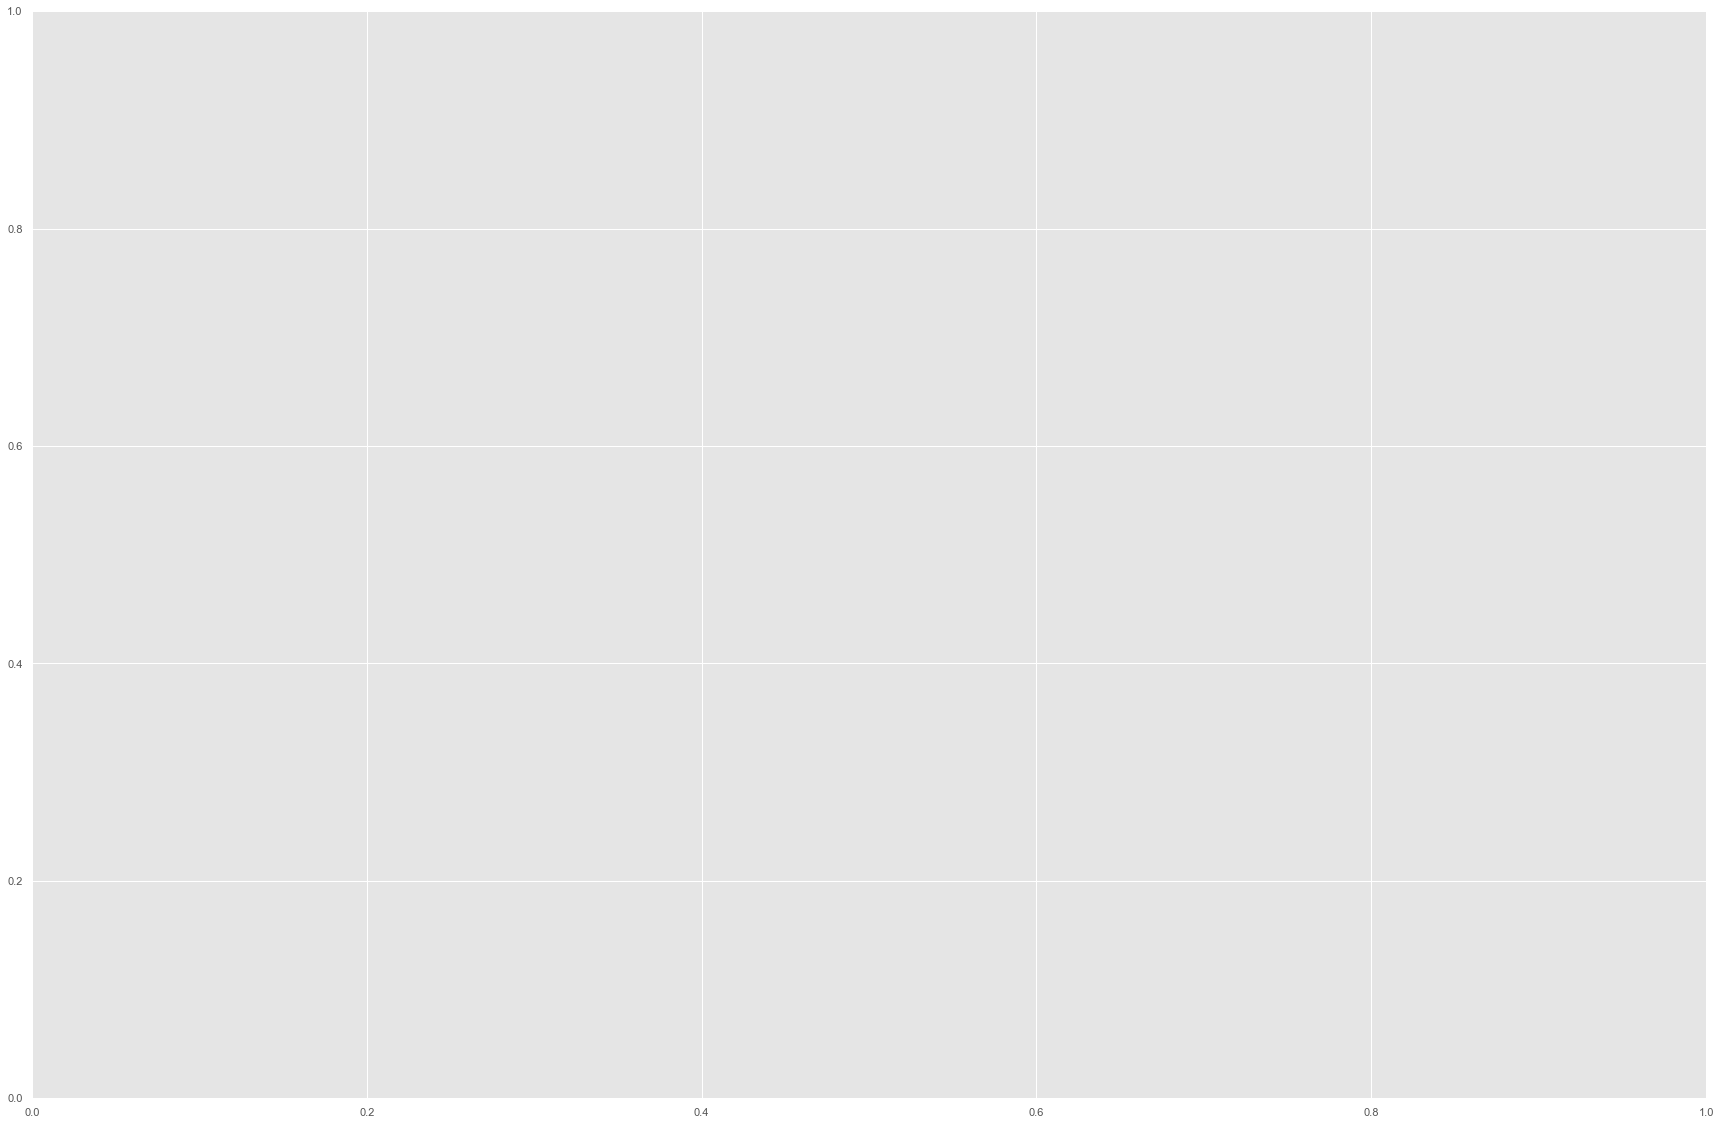

In [50]:
plt.plot(x, mean_canopy)
plt.plot(x, canopy_max_height)

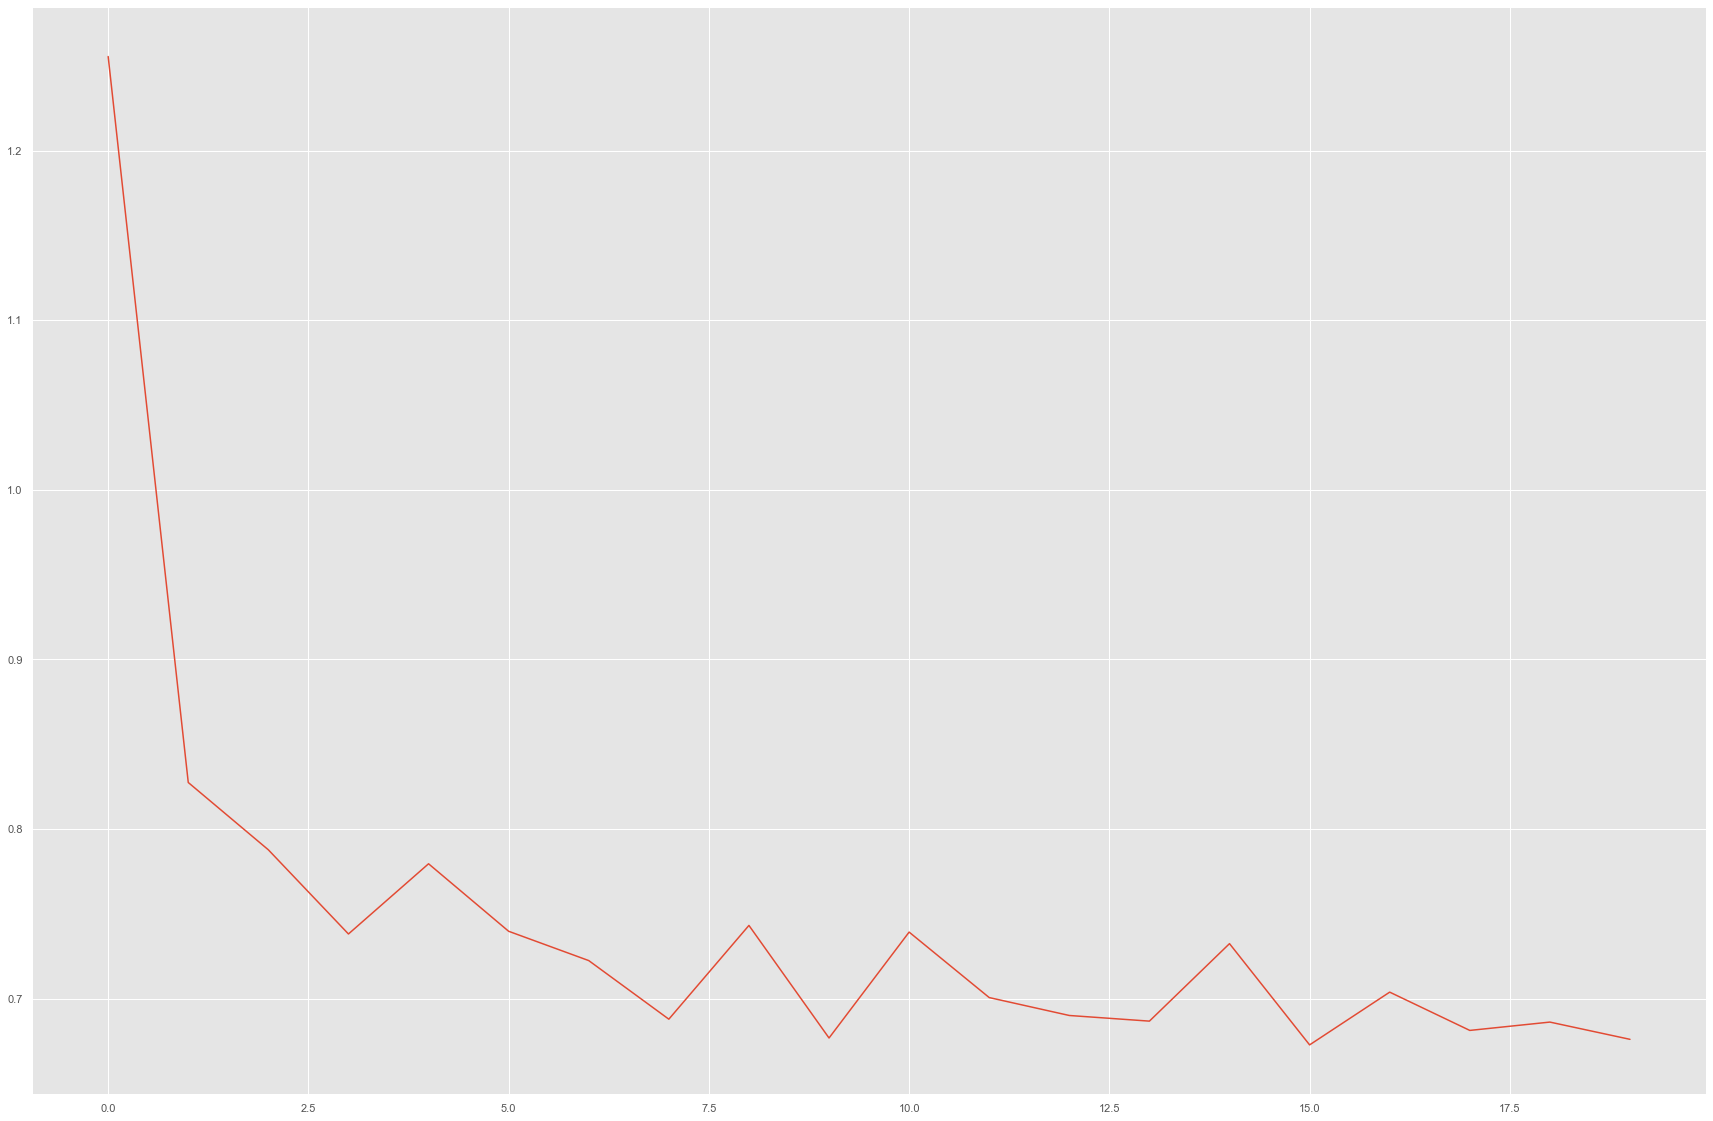

In [51]:
plt.plot(x, canopy_median_height)

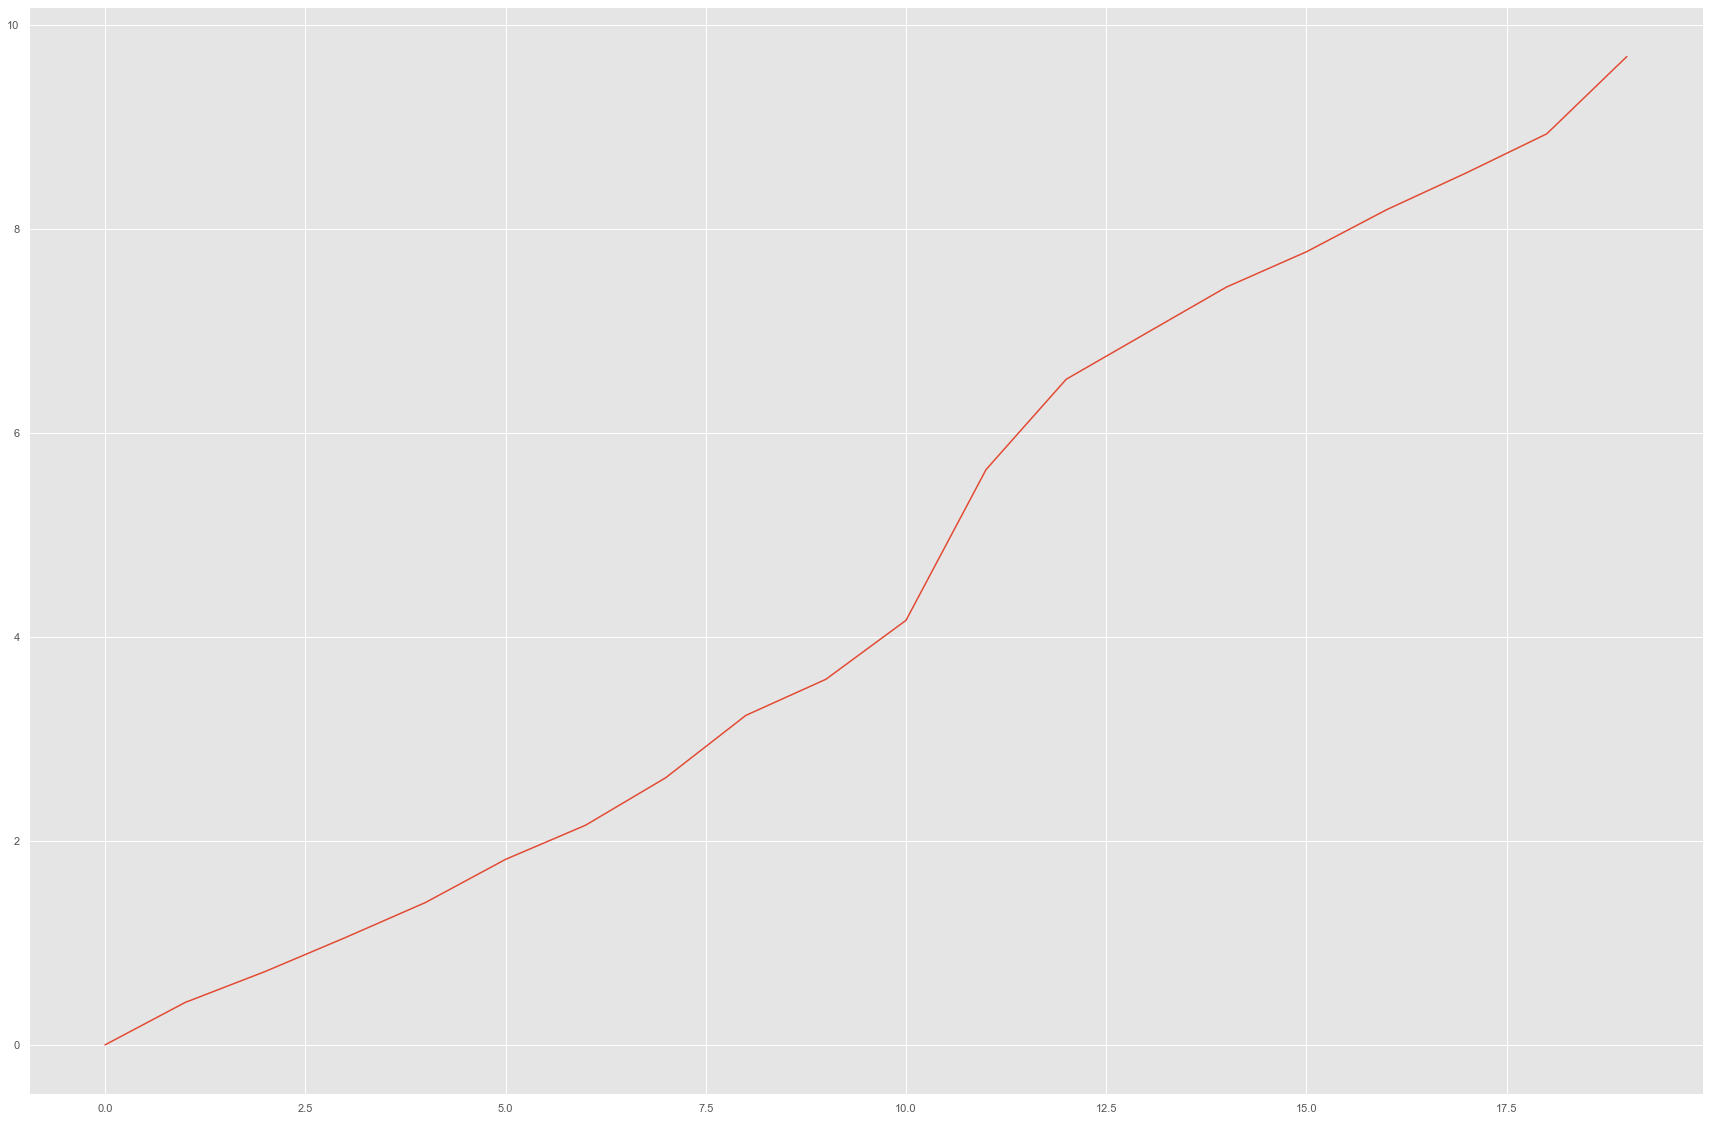

In [52]:
plt.plot(x, canopy_spread)

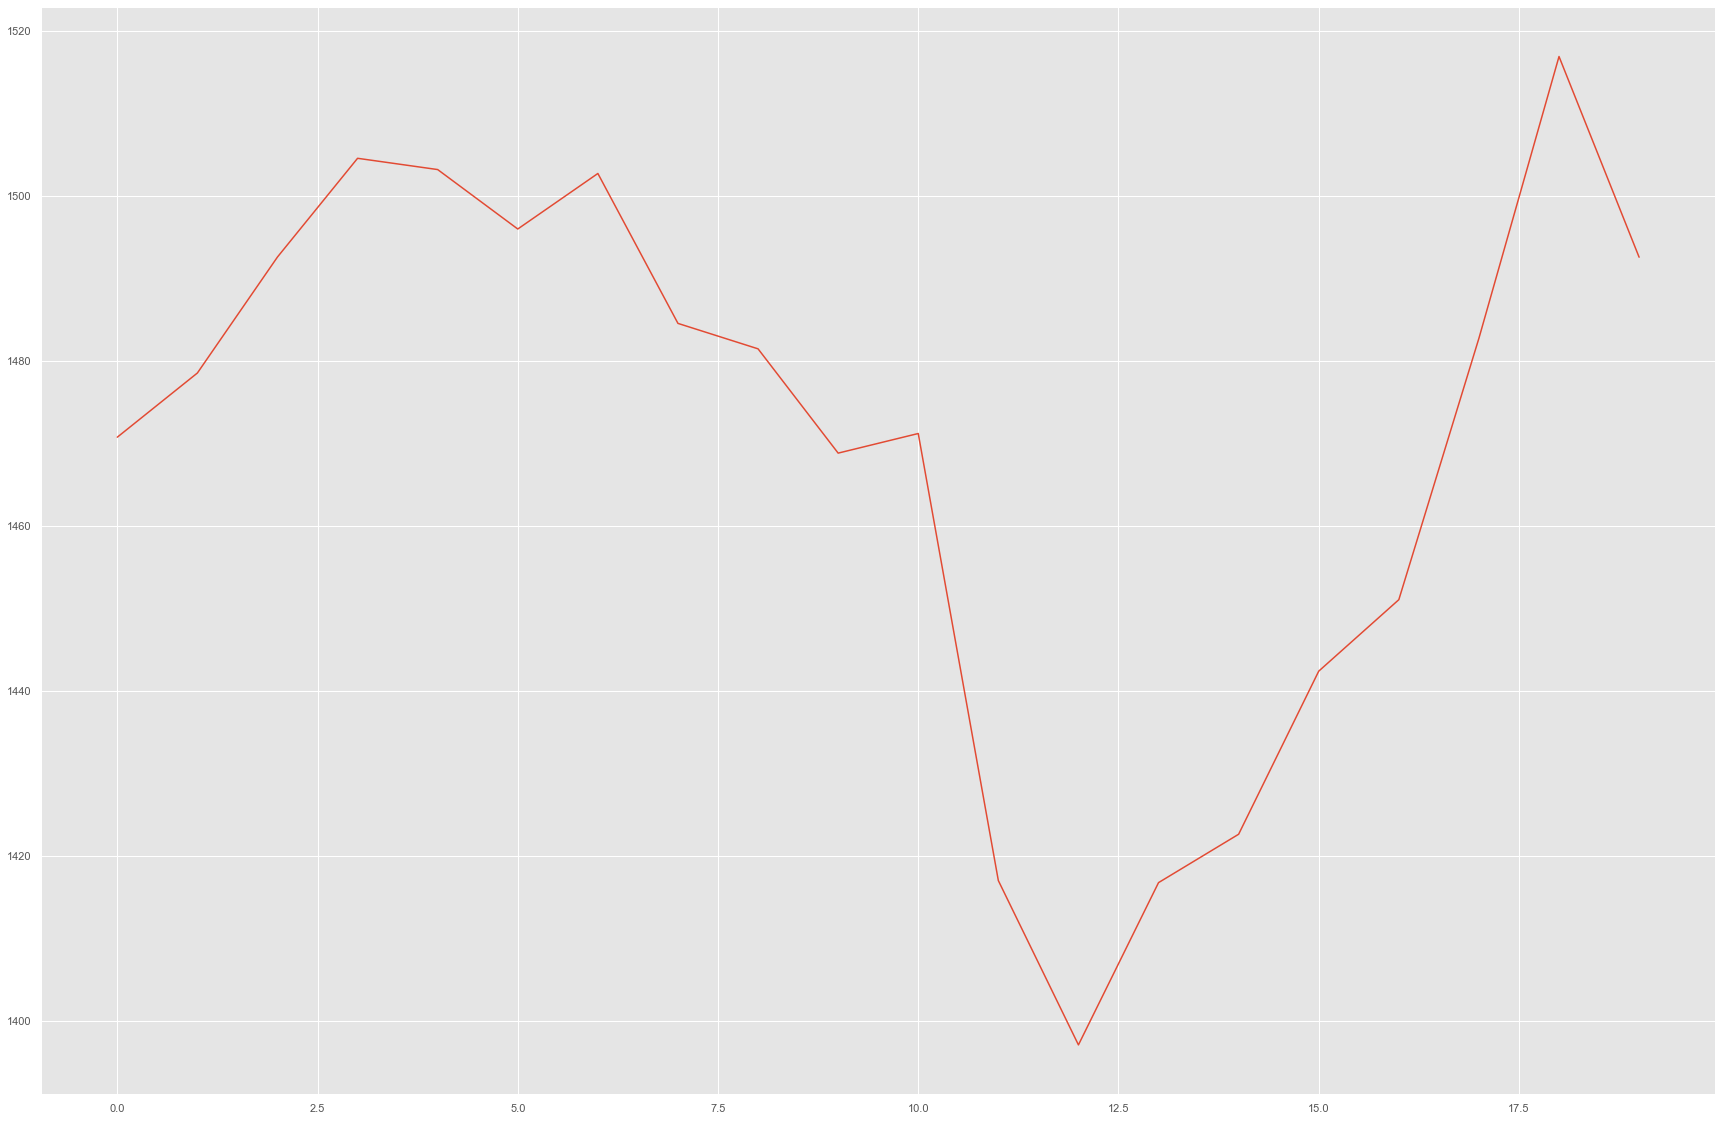

In [53]:
plt.plot(x, mean_NDVI)

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

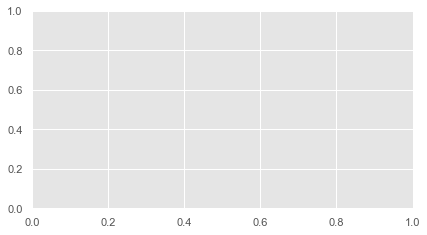

In [54]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(221)
plt.plot(x, mean_canopy)
plt.bar(x, mean_canopy, color='gray')
plt.ylabel("mean canopy")
ax = fig.add_subplot(222)
plt.plot(x, canopy_max_height)
plt.bar(x, canopy_max_height, color='gray')
plt.ylabel("canopy max height")
ax = fig.add_subplot(223)
plt.plot(x, canopy_spread)
plt.bar(x, canopy_spread, color='gray')
plt.ylabel("canopy spread")
ax = fig.add_subplot(224)
plt.plot(x, mean_NDVI)
plt.bar(x, mean_NDVI, color='gray')
plt.ylabel("Mean NDVI")

fig.suptitle('Mean NDVI', fontsize=30)


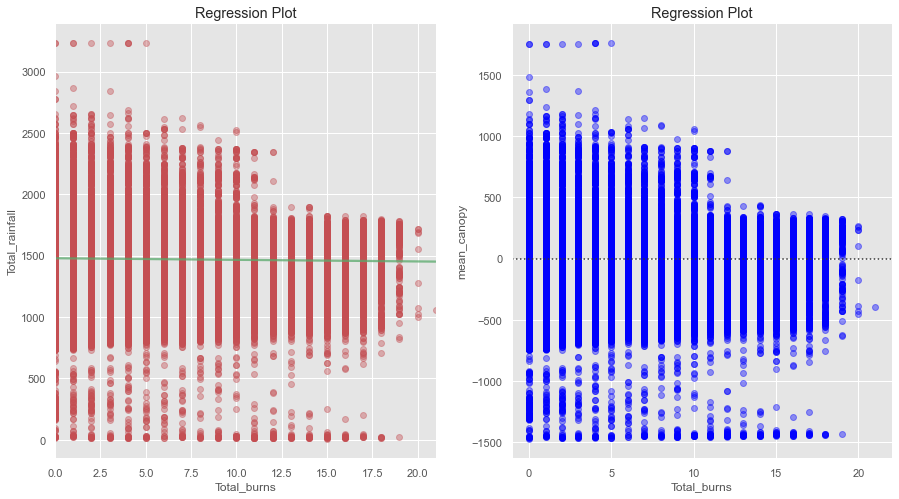

In [55]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x=data['Total_burns'], y= data['Total_rainfall'], color='r', fit_reg=True, data=data, order=1, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('Total_rainfall')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x=data['Total_burns'], y= data['Total_rainfall'], color='blue', data=data, order=1, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('mean_canopy')
ax.set_title('Regression Plot')

plt.show()

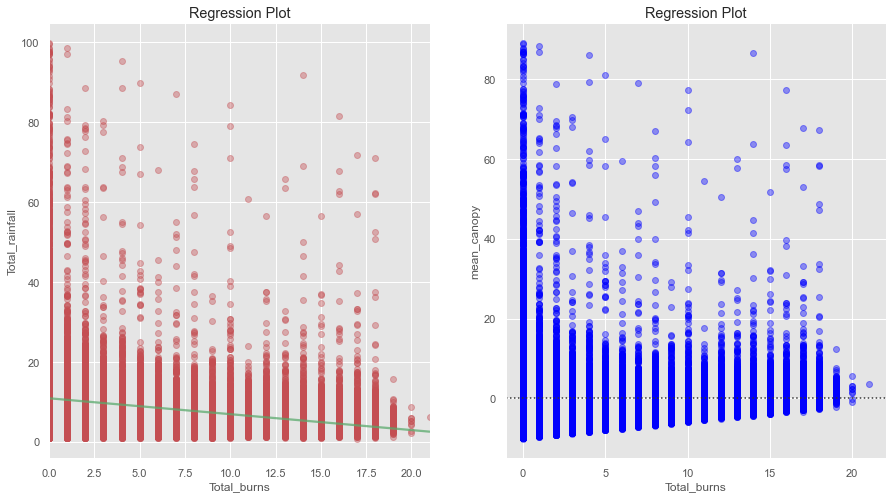

In [56]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x=data['Total_burns'], y= data['mean_canopy'], color='r', fit_reg=True, data=data, order=1, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('Total_rainfall')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x=data['Total_burns'], y= data['mean_canopy'], color='blue', data=data, order=1, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('mean_canopy')
ax.set_title('Regression Plot')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x=data['Total_burns'], y= data['mean_canopy'], color='r', fit_reg=True, data=data, order=2, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('Total_rainfall')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x=data['Total_burns'], y= data['mean_canopy'], color='blue', data=data, order=2, scatter_kws={'alpha':0.4},
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('Total_burns')
ax.set_ylabel('mean_canopy')
ax.set_title('Regression Plot')

plt.show()

In [ ]:
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit (data[['Total_burns','Total_rainfall', 'mean NDVI']], data['mean_canopy'])
print("Model Coefficients: " + str(reg.coef_))
print("Intercept: " + str(reg.intercept_))
print("R-statistics: " + str(reg.score(data[['Total_burns','Total_rainfall', 'mean NDVI']], data['mean_canopy'])))

In [ ]:
print("Correlation Coefficients:")
data[['Total_burns','Total_rainfall', 'mean NDVI', 'mean_canopy']].corr()

In [ ]:
# Scatter plot of quantitative variables
sns.pairplot(data, vars=['Total_rainfall', 'mean NDVI', 'mean_canopy'], hue='Total_burns')

In [ ]:
rainfall_list = []
BA_list = []
for i in range(1, 3000):
    rrainfall = data.loc[(data['Total_rainfall'] >= (i - 0.5)) & (data['Total_rainfall'] >= (i + 0.5))] 
    rainfall_mean = rainfall['Total_rainfall'].mean()
    BA_mean = rainfall['Total_burns'].mean()
    rainfall_list.append(rainfall_mean)
    BA_list.append(BA_mean)
    
X = rainfall_list
Y = BA_list
plt.scatter(X,Y)

In [ ]:
for i in range(1,2):
    rainfall = data.loc[(data['Total_rainfall'] >= (i - 0.5)) & (data['Total_rainfall'] >= (i + 0.5)) ]

rainfall_mean = rainfall['Total_rainfall'].mean()
BA_mean = rainfall['Total_burns'].mean()
print(rainfall_mean)
print(BA_mean)

In [ ]:
Total_rainfall